# Framingham Heart Study

**Analysis & Modelling done by Gaurav S. Padawe**

**Domain : Healthcare**

**Reason for Choosing this Dataset ?**

- <i>The Reason behind choosing this model is my Personal Interest to explore various Domains out there.</i>
- <i>I want to investigate how Machine Learning can help Healthcare industries to become Data-Driven. Where, ML can predict the likelihood of subject to suffer from a particular disease. Thereby, respective actions in the form of Treatments or Preventive Measures would be brought into consideration on the Individual.</i>
- <i>However, this Statistical models are not prepared to use for production environment.</i>

**Source (Download On Request) : https://biolincc.nhlbi.nih.gov/teaching/**

### Details :

The Framingham Heart Study is a long term prospective study of the etiology of cardiovascular disease among a population of free living subjects in the community of Framingham, Massachusetts. The Framingham Heart Study was a landmark study in epidemiology in that it was the first prospective study of cardiovascular disease and identified the concept of risk factors and their joint effects FHS Longitudinal Data Document.

The dataset is a rather small subset of possible FHS dataset, having 4240 observations and 16 variables. The variables are as follows:

- sex : the gender of the observations. The variable is a binary named “male” in the dataset.
- age : Age at the time of medical examination in years.
- education : A categorical variable of the participants education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
- currentSmoker: Current cigarette smoking at the time of examinations
- cigsPerDay: Number of cigarettes smoked each day
- BPmeds: Use of Anti-hypertensive medication at exam
- prevalentStroke: Prevalent Stroke (0 = free of disease)
- prevalentHyp: Prevalent Hypertensive. Subject was defined as hypertensive if treated
- diabetes: Diabetic according to criteria of first exam treated
- totChol: Total cholesterol (mg/dL)
- sysBP: Systolic Blood Pressure (mmHg)
- diaBP: Diastolic blood pressure (mmHg)
- BMI: Body Mass Index, weight (kg)/height (m)^2
- heartRate: Heart rate (beats/minute)
- glucose: Blood glucose level (mg/dL)

And finally the response variable : + TenYearCHD : The 10 year risk of coronary heart disease(CHD).

**Objective :**

- The goal is to make some predictive models on a FHS dataset, and reviewing some exploratory and modelling techiniques.



### Importing required Modules & Reading Data

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the Dataset

df = pd.read_csv('/content/framingham.csv', header=0)
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
#Shape of dataset

print ('No. of Records :', df.shape[0], '\nNo. of Features : ', df.shape[1])

No. of Records : 4240 
No. of Features :  16


- We can see that our Dataset contains 4240 examples / predictors and 16 features (including Target).

In [4]:
#Let us check datset's attribute info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


- Above results shows us that we've :
    - **(7) x int64** datatype attributes
    - **(9) x float64** datatype attributes.

### Data Cleansing and EDA

In [5]:
#Examining Null values in each feature

df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
#%percent null values

df.isnull().sum() / df.shape[0] * 100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

- We can examine that we got null values in following features :<b>
    - education          (105) - 2.47%
    - cigsPerDay          (29) - 0.68%
    - BPMeds              (53) - 1.25%
    - totChol             (50) - 1.17%
    - BMI                 (19) - 0.44%
    - heartRate            (1) - 0.02%
    - glucose            (388) - 9.15%

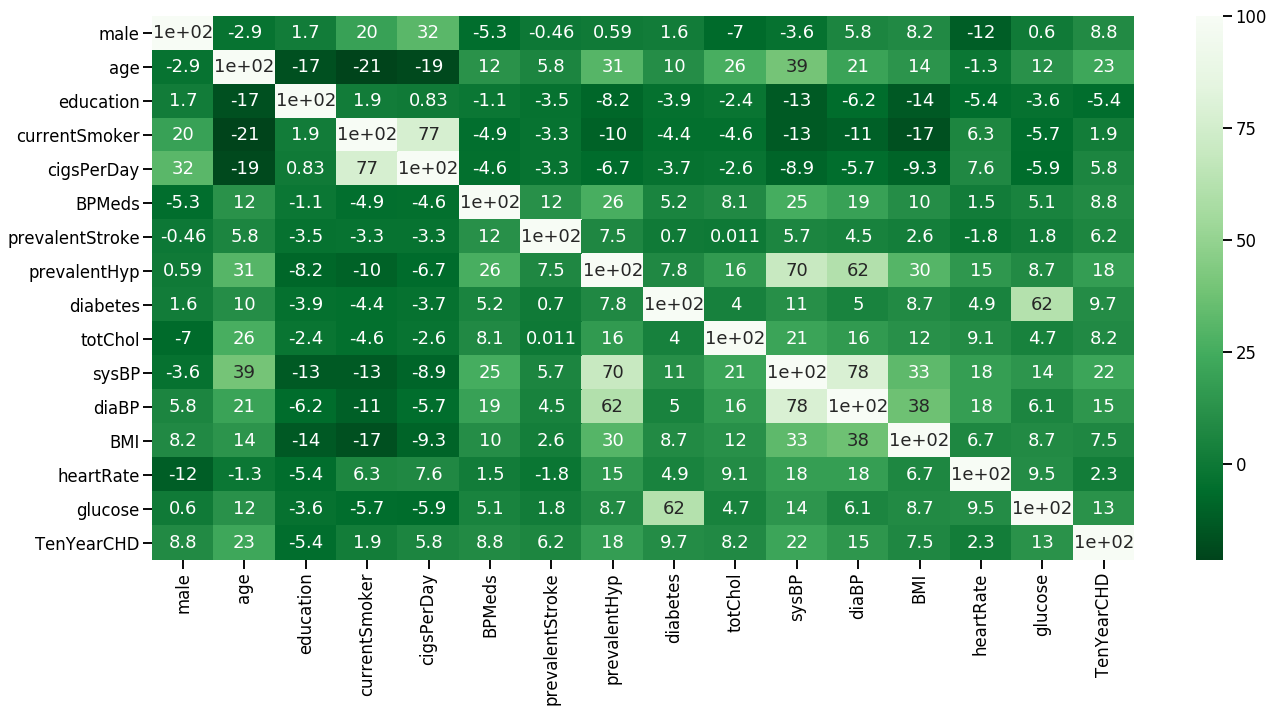

In [7]:
#Pearson Correlation

sns.set_context('talk')
plt.figure(figsize=(22,10))
sns.heatmap(df.corr()*100, annot=True, cmap='Greens_r')

**Observations :**

Correlation plot gives us valuable information regarding Colinearity within Attributes. It can be Either Negative or Positive or Nill. We need to always keep 1 feature off 2 Strongly Correlated ones but since we want to perform EDA we'll keep all and drop them before modelling.

- **currentSmoker & cigsPerDay** has strong Correlation of 77 (Scaled for better Observations)


- **prevalentHyp vs sysBP / diaBP** are having Positive Correlation of 70 and 62.


- While, **glucose & diabetes** are postively Correlated.


- **sysBP & diaBP** are also having Positive Correlation.

**Usually we fill Null Values with Measures of Central Tendency (Mean / Median / Mode) or we've options like Forward / Backward fill but in this case we can observe the Correlation plot and consider it to Fill missing values. E.g., We have Positive Correlation between currentSmoker & cigsPerDay, we know that currentSmoker has values either 1 (is a Smoker) or 0 (is not a Smoker), we can groupby currentSmoker and Impute Missing values based on Median. We can do the same for diabetes & glucose as they are correlated as well** 

In [0]:
#User defined function for missing value imputation

def impute_median(data):
    return data.fillna(data.median())

In [0]:
#Groupby currentSmoker & Glucose

current_smoker = df.groupby(['currentSmoker'])
gluco = df.groupby(['diabetes'])

In [0]:
#Missing value imputation using median and by observing correlation plot

df['cigsPerDay'] = current_smoker['cigsPerDay'].apply(impute_median)
df['glucose'] = gluco['glucose'].apply(impute_median)
df['education'].replace(np.nan, df['education'].median(), inplace=True)
df['BPMeds'].replace(np.nan, df['BPMeds'].median(), inplace=True)
df['totChol'].replace(np.nan, df['totChol'].median(), inplace=True)
df['BMI'].replace(np.nan, df['BMI'].median(), inplace=True)
df['heartRate'].replace(np.nan, df['heartRate'].median(), inplace=True)

In [11]:
#Rechecking if we have any missing value left

df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
#Changing Dtypes of categorical features

'''df['male'] = df['male'].astype('category')
df['education'] = df['education'].astype('category')
df['currentSmoker'] = df['currentSmoker'].astype('category')
df['cigsPerDay'] = df['cigsPerDay'].astype('int')
df['BPMeds'] = df['BPMeds'].astype('category')
df['prevalentStroke'] = df['prevalentStroke'].astype('category')
df['prevalentHyp'] = df['prevalentHyp'].astype('category')
df['diabetes'] = df['diabetes'].astype('category')
df['heartRate'] = df['heartRate'].astype('int')
df['TenYearCHD'] = df['TenYearCHD'].astype('category')'''

"df['male'] = df['male'].astype('category')\ndf['education'] = df['education'].astype('category')\ndf['currentSmoker'] = df['currentSmoker'].astype('category')\ndf['cigsPerDay'] = df['cigsPerDay'].astype('int')\ndf['BPMeds'] = df['BPMeds'].astype('category')\ndf['prevalentStroke'] = df['prevalentStroke'].astype('category')\ndf['prevalentHyp'] = df['prevalentHyp'].astype('category')\ndf['diabetes'] = df['diabetes'].astype('category')\ndf['heartRate'] = df['heartRate'].astype('int')\ndf['TenYearCHD'] = df['TenYearCHD'].astype('category')"

- We can change Dtypes of categorical Features to 'category' , while some values are integers but given as float so we can convert those to 'int'.


- If one wants to proceed ahead without Normalization then he / she can uncomment the above section and Proceed.


- While, Im going to perform Normalization on dataset it isn't necessary for me to change Dtype because post-normalization my dtypes will be all 'float'.

In [0]:
#df.dtypes

### EDA

- We'll explore various features in this section and perform Univariate, Bivariate & Multivariate Analysis.


- We'll observe descriptive statistics which will give us brief idea about spread of individual features.


- Visualizing Target attribute will shows us if we've imbalanced dataset.

In [14]:
#Descrptive Stats

df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,9.081132,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.799005,75.878774,81.664151,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.916119,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.070775,12.023937,22.942792,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


**Observations :**

Some the features are Discrete but let us analyze continuous ones

- **Age** : We can see that Min. age of subject found in given records is 32 while Max. being 70. So our values are ranging from 32 to 70.


- **cigsPerDay** : Subject smoking Cig. per day is as low as nill while we have 70 Cigs. per day making the Peak.


- **totChol** : Min. Cholesterol level recorded in our dataset is 107 while Max. is 696.


- **sysBP** : Min. Systolic Blood Pressure observed in Subject is 83 while Max. is 295.


- **diaBP** : Min. Diastolic Blood Pressure observed in Subject is 48 while Max. is 142.


- **BMI** : Body Mass Index in our dataset ranges from 15.54 to 56.


- **heartRate** : Observed Heartrate in our case study is 44 to 143.


- **glucose** : Glucose sugar level range is 40 to 394.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'CHD by Gender')

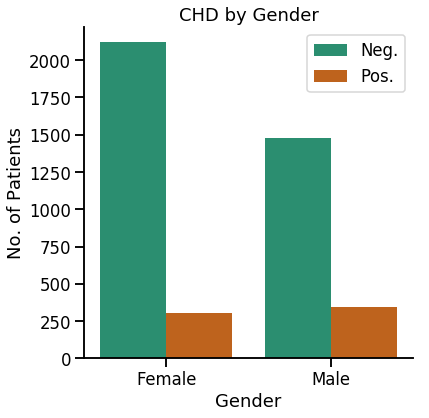

In [15]:
#CHD by Gender Viz.

sns.catplot(x='male', hue='TenYearCHD', data=df, kind='count', palette='Dark2', size=6, legend=False)
plt.xlabel('Gender')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('CHD by Gender')

**Observations :**

- Above Bivariate Analysis plot depicts Gender wise absence / presence of Chronic Heart Disease (CHD).


- Observations tells us that we've Excessive number of people who are not suffering from CHD.
    - **Negative** : Approx. 80 to 90% of Females are falling in Negative Category while Approx. 60 to 70% of Males are in Negative Slot.
    - **Positive** : While Approx. 10% of Females & Males are suffering from CHD.
    

- By this we can say that our Dataset is Imbalanced where Approx. 80 to 90% are Negative Classifications and Approx. 10 to 15% are Positive Classes.

Text(0.5, 1.0, 'Distribution of HeartRate')

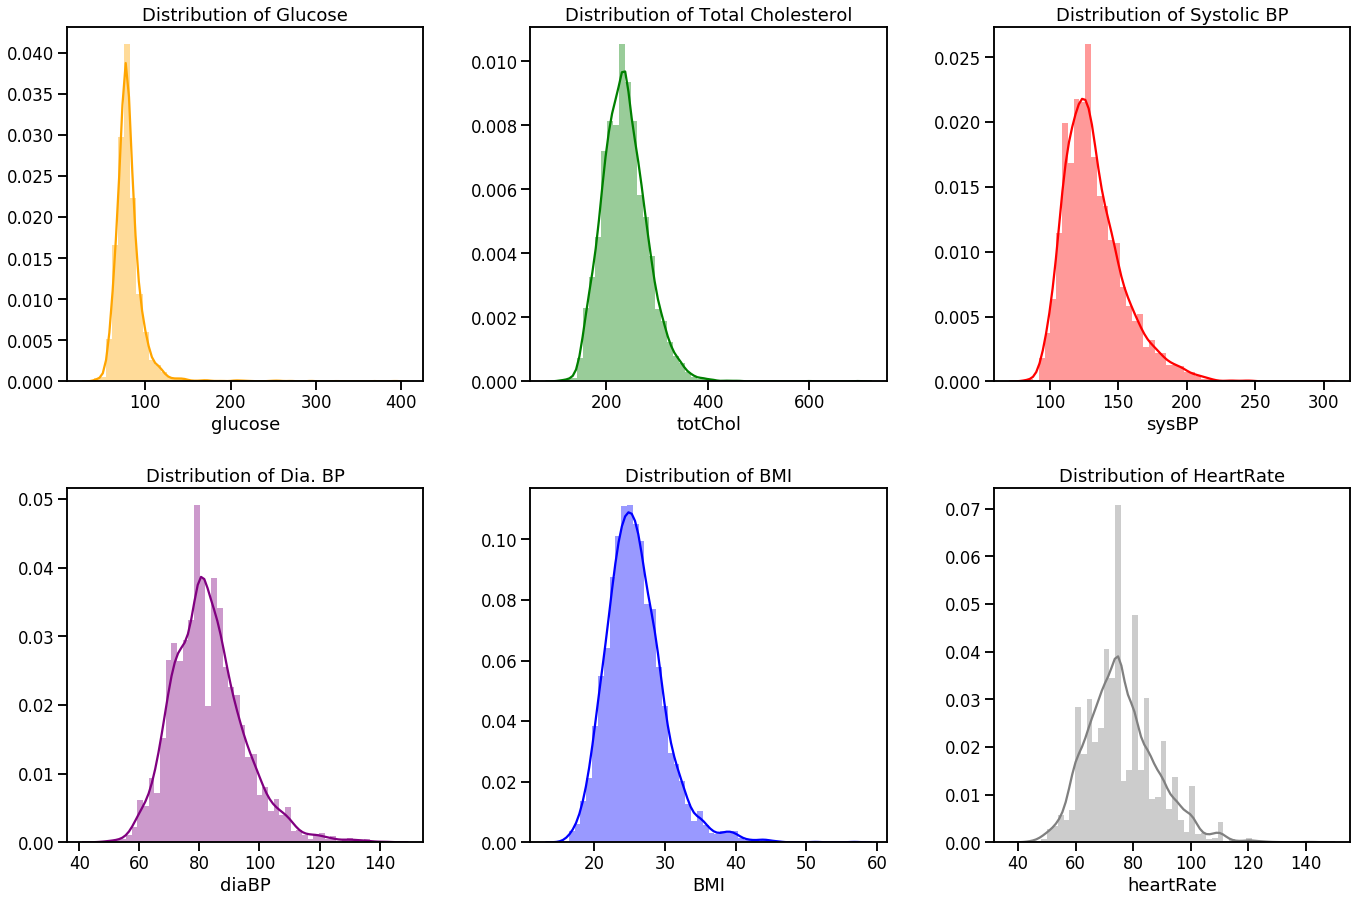

In [16]:
#Distribution of Continuous variables

plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.distplot(df['glucose'] , color='orange')
plt.title('Distribution of Glucose')

plt.subplot(2, 3, 2)
sns.distplot(df['totChol'], color='g')
plt.title('Distribution of Total Cholesterol')

plt.subplot(2, 3, 3)
sns.distplot(df['sysBP'], color='r')
plt.title('Distribution of Systolic BP')

plt.subplot(2, 3, 4)
sns.distplot(df['diaBP'] , color='purple')
plt.title('Distribution of Dia. BP')

plt.subplot(2, 3, 5)
sns.distplot(df['BMI'], color='blue')
plt.title('Distribution of BMI')

plt.subplot(2, 3, 6)
sns.distplot(df['heartRate'], color='grey')
plt.title('Distribution of HeartRate')

**Observations :**

- We can see **Glucose, Total Cholesterol, Systolic BP & BMI** is **Right Skewed.**


- While **Diastolic BP & Heart Rate** is **Normally Distributed.**

Text(0.5, 1.0, 'Distribution of Age')

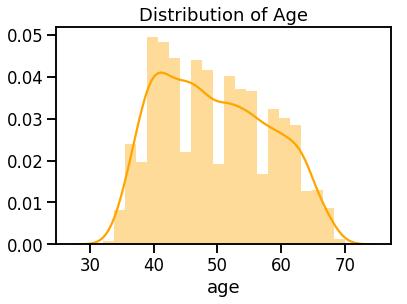

In [17]:
#Distribution of Age

sns.distplot(df['age'] , color='orange')
plt.title('Distribution of Age')

**Observation :**

- Subjects ranging from Age 40 to 50 are in Majority followed by 50 to 70.


- Let us define a user-defined Function to encode Age.

In [0]:
#User-defined function for Age encoding

def encode_age(data):
    if data <= 40:
        return 0
    if data > 40 and data <=55:
        return 1
    else:
        return 2    
    
df['encode_age'] = df['age'].apply(lambda x : encode_age(x))

In [0]:
def heartrate_enc(data):
    if data <= 60:
        return 0
    if data > 60 and data <=100:
        return 1
    else:
        return 2
    
df['enc_hr'] = df['heartRate'].apply(heartrate_enc)

- Above Functions will Encode Age and Heart Rate.


- We can encode the Age Group Further :
    - Subject with **Age <= 40** are **Adults.**
    - Subject with **Age > 40 and <= 55** are **Middle-Aged Adult.**
    - Subject **Above 55** will fall in **Senior** Category.


- We'll Encode HeartRate as follows:
    - HeartRate **<= 60** is **Low / Resting** HeartBeat.
    - HeartRate **between 60 to 100** is considered as **Normal.**
    - While, HeartRate **above 100** is **High.**

([<matplotlib.axis.XTick at 0x7f54d27f99b0>,
 <a list of 3 Text xticklabel objects>)

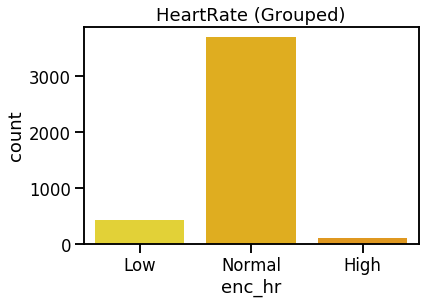

In [20]:
#HeartRate (Grouped) Count

sns.countplot(df['enc_hr'], palette='Wistia')
plt.title('HeartRate (Grouped)')
plt.xticks([0,1,2], ['Low', 'Normal', 'High'])

- We can observe that Subject with Normal HeartRate are in Majority followed by Resting / Low HeartRate and High HeartRate.

Text(0.5, 1.0, 'Count by Age Group')

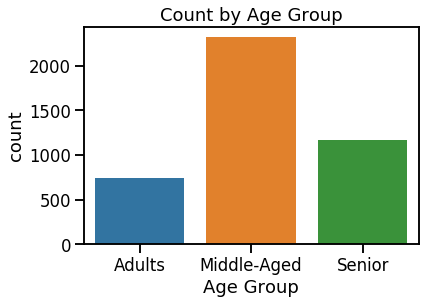

In [21]:
#Age Group plot

sns.countplot(df['encode_age'])
plt.xlabel('Age Group')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Count by Age Group')

- We've more number of Middle-Aged Adults in our Dataset followed by Seniors And then Adults.

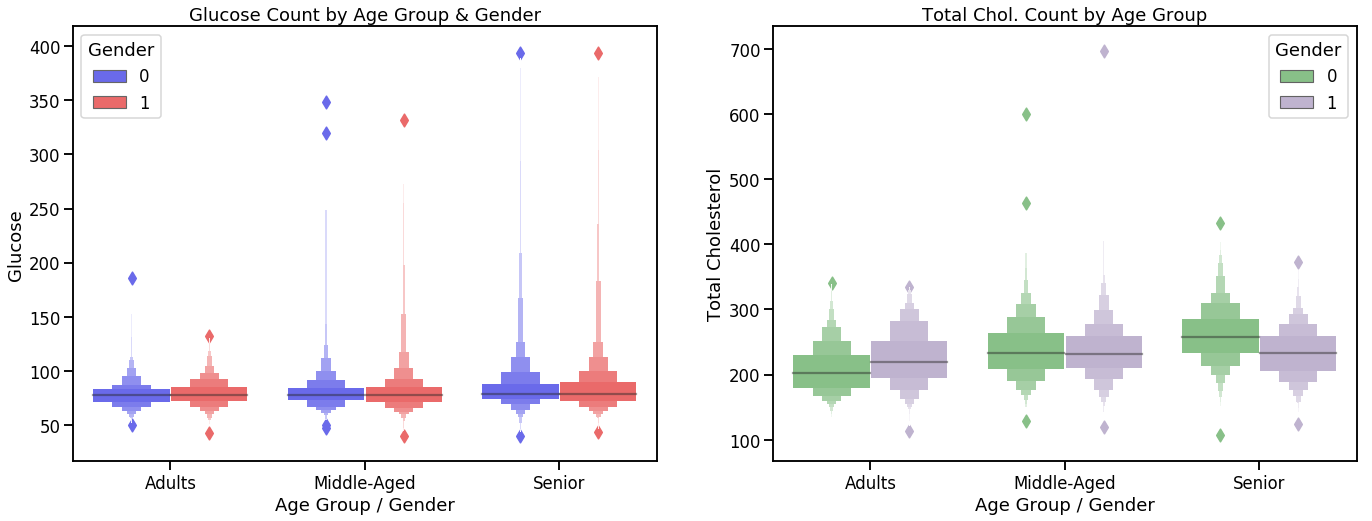

In [22]:
#Multivariate Analysis Pt. 1

plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='glucose', hue='male', data=df, palette='seismic')
plt.xlabel('Age Group / Gender')
plt.ylabel('Glucose')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Glucose Count by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='totChol', hue='male', data=df, palette='Accent')
plt.xlabel('Age Group / Gender')
plt.ylabel('Total Cholesterol')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Total Chol. Count by Age Group')
plt.legend(title='Gender')

**Observations :**

- **Glucose Count by Age Group & Gender** : We can clearly observe that as Age increases the count of Glucose increases too. While Gender wise Glucose Count has almost similiar Median with Few outliers in each.


- **Total Cholesterol by Age Group & Gender** : Excluding Outliers, Observation make us Clear that for females Cholesterol level is Increasing by Age considering the Quantile (25%, 50%, 75%) values into account. While, for Males the Cholesterol level Quantile is Approx. Similar for each Age Group.

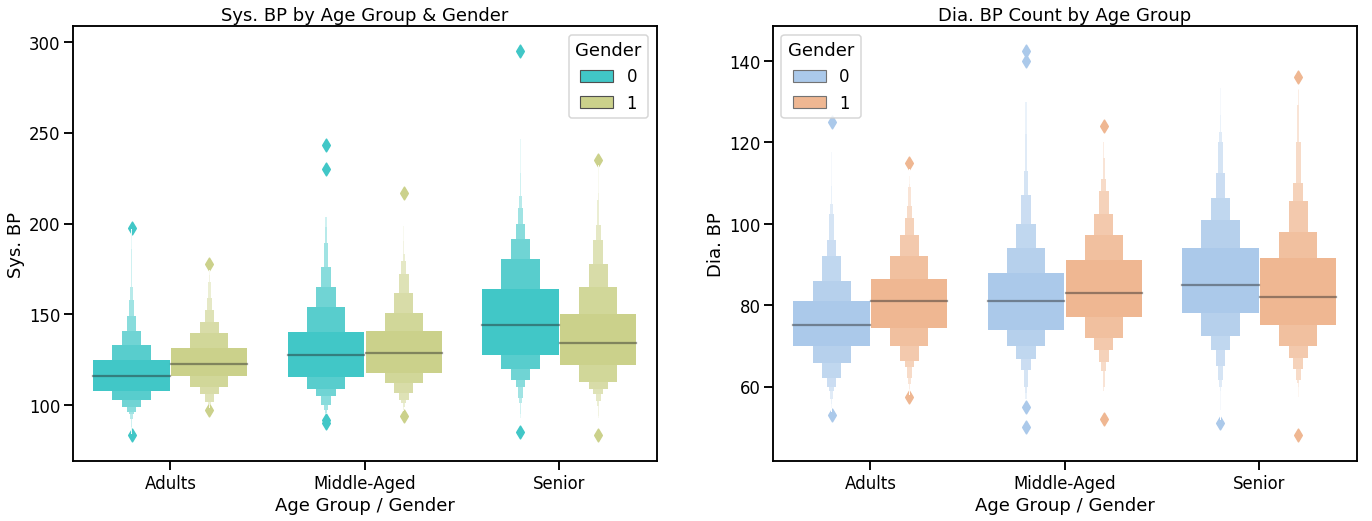

In [23]:
#Multivariate Analysis Pt. 2

plt.figure(figsize=(23,8))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

plt.subplot(1, 2, 1)
sns.boxenplot(x='encode_age', y='sysBP', hue='male', data=df, palette='rainbow')
plt.xlabel('Age Group / Gender')
plt.ylabel('Sys. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Sys. BP by Age Group & Gender')
plt.legend(title='Gender')

plt.subplot(1, 2, 2)
sns.boxenplot(x='encode_age', y='diaBP', hue='male', data=df, palette='pastel')
plt.xlabel('Age Group / Gender')
plt.ylabel('Dia. BP')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Dia. BP Count by Age Group')
plt.legend(title='Gender')

**Observations :**

- **Sys. BP by Age Group & Gender** : Sys. BP is Increasing by Age Group and Gender.


- **Dia. BP by Age Group & Gender** : Similar to Sys. BP , the Dia. BP is seen Increasing by Age Group & Gender.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Cigs. per day by Age Group')

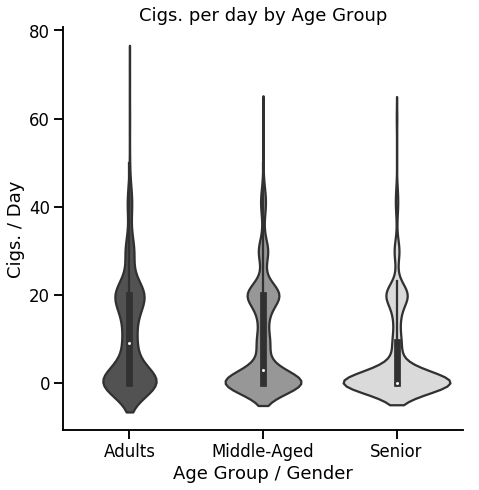

In [24]:
#Violin Plot of Cigsperday by age group

sns.catplot(data=df, x='encode_age', y='cigsPerDay', kind='violin', size=7, palette='Greys_r')
plt.xlabel('Age Group / Gender')
plt.ylabel('Cigs. / Day')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.title('Cigs. per day by Age Group')

**Observation :**

- **Adults** : In Adults we can observe that Median values has Lower Kernel Density followed by 75% IQR's Density. While, 25% IQR marks the Higher Kernel Density.


- **Middle-Aged** : In Middle-Aged Group we can observe that 25% IQR & Median has Higher Kernel Density while 75% IQR has a quite Lower Kernel Density.


- **Senior** : In Seniority section we can observe that Median and 25% IQR are Closely Intact to each other having Higher Kernel Density, while 75% IQR got Lower Kernel Density.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Diabetes by Age Group')

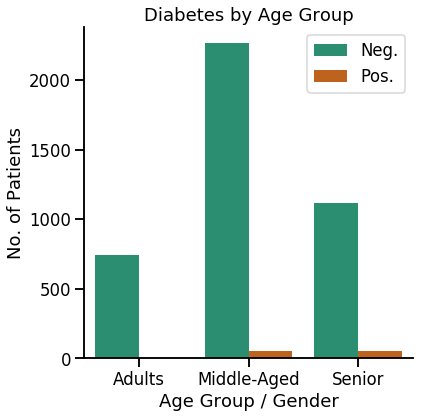

In [25]:
#Diabetes by Age Group

sns.catplot(x='encode_age', hue='diabetes', data=df, kind='count', palette='Dark2', size=6, legend=False)
plt.xlabel('Age Group / Gender')
plt.xticks(ticks=[0,1,2], labels=['Adults', 'Middle-Aged', 'Senior'])
plt.ylabel('No. of Patients')
plt.legend(['Neg.', 'Pos.'])
plt.title('Diabetes by Age Group')

**Observation :**

- **Adults** : Subject with Negative Diabetes Diagnosis are approx. 800 count while Positive Diabetes Diagnosis is Almost Nill.


- **Middle-Aged** : Subject with Negative Diabetes Diagnosis are reaching the Peak of Approx. 2500 Count while Positive Count is Under 100.


- **Senior** : Subject diagnosed Negative are Approx. 1000 while Positive Count is Under 100.

Text(0.5, 1.0, 'Target Class Count')

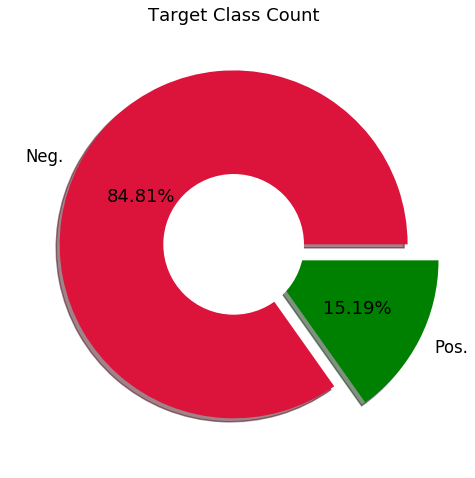

In [26]:
#Target Class count

plt.figure(figsize=(8,8))
plt.pie(df['TenYearCHD'].value_counts(), labels=['Neg.','Pos.'], autopct='%1.2f%%', explode=[0,0.2], shadow=True, colors=['crimson','g'])
my_circle = plt.Circle( (0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

**Observations :**

- We can see that we've Imbalanced Dataset here having ratio of 85:15 where Positive Class is Minor.


- We'll need to Over-sample the Dataset in this case to get the best out of it.


- But before we proceed with Over-Sampling we'll First try Basic Logistic Regression Model on Data we prepared. 

In [27]:
#Log Transform Continuous Variables

'''df['log_cigsPerDay'] = np.log1p(df['cigsPerDay'])
df['log_totChol'] = np.log1p(df['totChol'])
df['log_sysBP'] = np.log1p(df['sysBP'])
df['log_diaBP'] = np.log1p(df['diaBP'])
df['log_BMI'] = np.log1p(df['BMI'])
df['log_heartRate'] = np.log1p(df['heartRate'])
df['log_glucose'] = np.log1p(df['glucose'])

df['log_age'] = np.log10(df['age'])'''

"df['log_cigsPerDay'] = np.log1p(df['cigsPerDay'])\ndf['log_totChol'] = np.log1p(df['totChol'])\ndf['log_sysBP'] = np.log1p(df['sysBP'])\ndf['log_diaBP'] = np.log1p(df['diaBP'])\ndf['log_BMI'] = np.log1p(df['BMI'])\ndf['log_heartRate'] = np.log1p(df['heartRate'])\ndf['log_glucose'] = np.log1p(df['glucose'])\n\ndf['log_age'] = np.log10(df['age'])"

In [0]:
#Dropping columns which we Log transformed

#df.drop(['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'], axis=1, inplace=True)

In [0]:
#Making a copy of Dataset

df_copy = df.copy()

In [30]:
#Normalizing dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = df_copy.drop(['TenYearCHD', 'cigsPerDay', 'sysBP', 'heartRate', 'age'], axis=1).columns

norm_df = scaler.fit_transform(df_copy.drop(['TenYearCHD', 'cigsPerDay', 'sysBP', 'heartRate', 'age'], axis=1))
norm_df = pd.DataFrame(data=norm_df, columns=cols, index=df_copy.drop(['TenYearCHD', 'cigsPerDay', 'sysBP', 'heartRate', 'age'], axis=1).index)
norm_df.head()

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,diaBP,BMI,glucose,encode_age,enc_hr
0,1.153113,2.006069,-0.988276,-0.173569,-0.077014,-0.671241,-0.162437,-0.940086,-1.083027,0.287693,-0.203319,-1.653005,0.224455
1,-0.867217,0.019908,-0.988276,-0.173569,-0.077014,-0.671241,-0.162437,0.300797,-0.159355,0.720094,-0.246911,-0.150273,0.224455
2,1.153113,-0.973172,1.011863,-0.173569,-0.077014,-0.671241,-0.162437,0.187990,-0.243325,-0.112769,-0.508461,-0.150273,0.224455
3,-0.867217,1.012988,1.011863,-0.173569,-0.077014,1.489778,-0.162437,-0.263241,1.016227,0.683242,0.930068,1.352458,0.224455
4,-0.867217,1.012988,1.011863,-0.173569,-0.077014,-0.671241,-0.162437,1.090450,0.092555,-0.663098,0.145416,-0.150273,0.224455


- Above we had Standard Scaled Data to Normalize the Dataset.


- And we've created new Dataset as norm_df


- We're dropping few features here because they are Positively Correlated (As we can saw in Correlation Plot) 

In [31]:
#train-test split

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

x = norm_df
y = df_copy['TenYearCHD']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=26)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2756, 13), (1484, 13), (2756,), (1484,))

- Above we had divided Traning & Validation Set with 0.35 Test Size.


- Now we've 2756 Records For Training and 1484 Records for Evaluation / Validation.


- Ahead, we'll put forth Logistic Regression as our Estimator.

### Logistic Regression

In [32]:
#Logistic Regression Estimator

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

est_reg = LogisticRegression(solver='liblinear').fit(x_train, y_train)
pred = est_reg.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

- Logistic Regression is always a best approach before moving ahead to complex Algorithms.


- Most of the times if we have done good Feature Engineering then algorithms as simple as Logistics Regression can give us fairly acceptable results.


- We will choose our solver as "liblinear" because our dataset isn't big to try other solvers so we'll go ahead with "liblinear"

Accuracy Score : 0.8477088948787062
Training Score : 0.8559506531204645
Cross Validation Score :  0.8530522322570772
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1468
           1       0.04      0.62      0.08        16

    accuracy                           0.85      1484
   macro avg       0.52      0.74      0.50      1484
weighted avg       0.98      0.85      0.91      1484



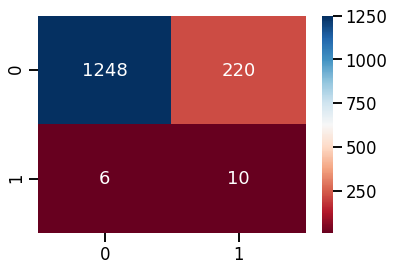

In [33]:
#Metrics Evaluation

print ('Accuracy Score :', accuracy_score(pred, y_test))
print ('Training Score :', est_reg.score(x_train, y_train))
print ('Cross Validation Score : ', cross_val_score(est_reg,x_train, y_train, cv=5).mean())
print (classification_report(pred, y_test))

sns.heatmap(confusion_matrix(pred, y_test), annot=True, cmap='RdBu', fmt='d')

**Understanding the Metrics :**

- **Accuracy Score** : Accuracy Score in Imbalanced Dataset can be a Trap.
    
    - **Why Accuracy is not our Evaluation Metrics ?**
    - **Ans.:** We get illusion of High Accuracy because our Estimator Learns well from Majority Class and is able to Predict well on Majority Class but not Minority Class leaving us in an illusion of High Accuracy. 0.8477 seems like a good accuracy but it has no value Since we can see we've Misclassification happening for Minority Class.


- **Cross-Val Score** : Cross-Validation Scores uses the average of the output, which will be affected by the number of folds. Cross-Validation Scores Help us Identify if our Model is Over / Under-fitting. 


- **Classification Report** : In Classification Report our Important metrics is Precision (TP/TP + FP) & Recall (TP/TP + FN). We can see our Recall Scores are good for both Classes but Precision Score isn't good for Positive Class.


- **Confusion Matrix** : Diagonal Values of Confusion Matrix are correct. So we can see that In Negative Diagnosis out of 1468 the 1248 are correctly Classified while 220 are Classified as Positively. While, In case of Positive Diagnosis out of 16 examples 10 are Classified correctly while 6 Classified as Negatively. (Below is Interpretation of Confusion Matrix).

![alt text](https://blog.exsilio.com/wp-content/uploads/2016/09/table-blog.png)<br>


- **Let us add Class Weight Parameter to our Logistic Regression Estimator and see if it makes any Difference**

In [34]:
#Logistic Regression , adding class weight as balanced

est_reg = LogisticRegression(solver='liblinear', class_weight='balanced').fit(x_train, y_train)
pred = est_reg.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 1])

Accuracy Score : 0.6637466307277629
Training Score : 0.6698113207547169
Cross Validation Score :  0.6639978073164374
              precision    recall  f1-score   support

           0       0.67      0.91      0.77       931
           1       0.62      0.26      0.36       553

    accuracy                           0.66      1484
   macro avg       0.64      0.58      0.57      1484
weighted avg       0.65      0.66      0.62      1484



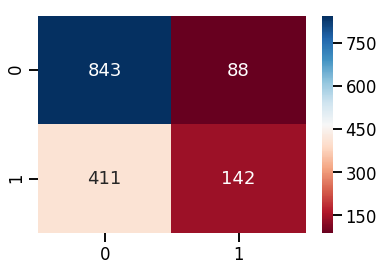

In [35]:
#Examining Metric 

print ('Accuracy Score :', accuracy_score(pred, y_test))
print ('Training Score :', est_reg.score(x_train, y_train))
print ('Cross Validation Score : ', cross_val_score(est_reg,x_train, y_train, cv=5).mean())
print (classification_report(pred, y_test))

sns.heatmap(confusion_matrix(pred, y_test), annot=True, cmap='RdBu', fmt='d')

**Understanding the Metrics :**

- By adding Class Weight Parameter to our Estimator we got good Precision Score but Model is still suffering from Lowest Recall Score for Minority Class , i.e, Positive Class.


- Also, we can Interpret Confusion Matrix above. We can examine the Second Row. Only 142 are Classified Correct. Now this can be dangerous. Let me explain you how.


- **If Positive Class , i.e, One who actually has CHD is Classified as Negative Class then its a real threat as no actions will be taken on the Subject. So such Model cannot be deployed in Production.**


- Let us Proceed ahead with Over-Sampling and examine our Metrics.

In [36]:
#Hyper Parameter Tuning

'''params = {'solver':('lbfgs','liblinear', 'newton-cg'),
          #'penalty':('l1', 'l2', 'elasticnet', 'None'),
          #'max_iter':('2000', '2500'),
          'class_weight':('balanced', 'None')}

est_log_reg = LogisticRegression()

clf = GridSearchCV(est_log_reg, params, cv=5).fit(x_train, y_train)'''

"params = {'solver':('lbfgs','liblinear', 'newton-cg'),\n          #'penalty':('l1', 'l2', 'elasticnet', 'None'),\n          #'max_iter':('2000', '2500'),\n          'class_weight':('balanced', 'None')}\n\nest_log_reg = LogisticRegression()\n\nclf = GridSearchCV(est_log_reg, params, cv=5).fit(x_train, y_train)"

### Over-Sampling

- We'll over-sample the dataset using 50% Random Over-Sampling of Minority Class and Later use SMOTE.


- We'll Slice the dataset into the 2 distinctive classes which we have.

### Random Upsampling

- Random Over-sampling is upsampling technique in which Random examples of minority class are repeated to match majority class.

In [37]:
#Slicing Dataframe of Respective Classes

df0 = df[df['TenYearCHD'] == 0]
df1 = df[df['TenYearCHD'] == 1]

#resample

df_pos_upsample = df1.sample(df0.shape[0] // 2, replace=True)
df_pos_upsample.reset_index(inplace=True)
df_pos_upsample.drop('index', axis=1, inplace=True)
df = pd.concat([df, df_pos_upsample], axis=0)
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,encode_age,enc_hr
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,0,1
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,1,1
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,1,1
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,2,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,1,1


In [38]:
#Target Class count after Random Over-Sampling

df['TenYearCHD'].value_counts()

0    3596
1    2442
Name: TenYearCHD, dtype: int64

- Above we can observe that we've **3596 examples of Negative Class** and **2442 examples of Positive Class** post Random Upsampling.

In [39]:
#Normalizing dataset

cols = df.drop(['TenYearCHD', 'cigsPerDay', 'sysBP', 'heartRate', 'age'], axis=1).columns

norm_df = scaler.fit_transform(df.drop(['TenYearCHD', 'cigsPerDay', 'sysBP', 'heartRate', 'age'], axis=1))
norm_df = pd.DataFrame(data=norm_df, columns=cols, index=df.drop(['TenYearCHD', 'cigsPerDay', 'sysBP', 'heartRate', 'age'], axis=1).index)
norm_df.head()

,male,education,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,diaBP,BMI,glucose,encode_age,enc_hr
0,1.085454,2.036737,-0.997023,-0.204335,-0.093204,-0.758464,-0.191224,-0.963098,-1.106829,0.219859,-0.224035,-1.795832,0.207678
1,-0.921273,0.061818,-0.997023,-0.204335,-0.093204,-0.758464,-0.191224,0.232650,-0.249355,0.633576,-0.259919,-0.293375,0.207678
2,1.085454,-0.925641,1.002986,-0.204335,-0.093204,-0.758464,-0.191224,0.123946,-0.327307,-0.163300,-0.475218,-0.293375,0.207678
3,-0.921273,1.049278,1.002986,-0.204335,-0.093204,1.318454,-0.191224,-0.310872,0.841975,0.598316,0.708928,1.209083,0.207678
4,-0.921273,1.049278,1.002986,-0.204335,-0.093204,-0.758464,-0.191224,0.993581,-0.015499,-0.689848,0.063030,-0.293375,0.207678


- Again, we had used Standard Scaler as our Normalizer and formed a new dataset as norm_df.


- Also, we drop those Unwanted columns which had Strong Positive Correlation.

In [40]:
#train-test split

x = norm_df
y = df['TenYearCHD']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=26)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3924, 13), (2114, 13), (3924,), (2114,))

- Now, we've 3924 Records for Training and 2114 for Validation.


- As we've toupsample our dataset with SMOTE we had implemented train_test_split before applying SMOTE. We cannot upsample it after SMOTE since that will leak information from training set into validation set.

### SMOTE

- SMOTE creates synthetic observations based upon the existing minority observations.


- SMOTE is widely used by Data Science Practioners.

In [41]:
#Applying SMOTE

from imblearn.over_sampling import SMOTE, ADASYN, SVMSMOTE

smote = SMOTE(sampling_strategy='not majority')
x_s_res, y_s_res = smote.fit_sample(x_train, y_train)

print (y_train.value_counts(), '\n')
np.bincount(y_s_res)

0    2348
1    1576
Name: TenYearCHD, dtype: int64 



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


array([2348, 2348])

- Above we've used imblearn's SMOTE which is easiest to implement.


- We're using sampling strategy as "not majority" as it is similar to Minority Over-sampling.


- Post-Application we can validate that SMOTE was successful and we've 2348 examples now of each class.

### Logistic Regression

In [42]:
est_reg = LogisticRegression(solver='liblinear', max_iter=2000, class_weight='balanced').fit(x_s_res, y_s_res)
pred = est_reg.predict(x_test)
pred

array([0, 1, 0, ..., 0, 0, 0])

- We'll run the model for Maximum of 2000 Iterations having the Class Weight Balanced.


- liblinear is better for binary classificaions. It works well on small datasets with high dimensions.

Accuracy Score : 0.6471144749290445
Training Score : 0.6603492333901193
Cross Validation Score :  0.6580020868302863
              precision    recall  f1-score   support

           0       0.64      0.73      0.68      1088
           1       0.66      0.56      0.61      1026

    accuracy                           0.65      2114
   macro avg       0.65      0.64      0.64      2114
weighted avg       0.65      0.65      0.64      2114



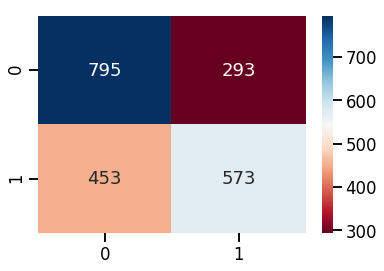

In [43]:
print ('Accuracy Score :', accuracy_score(pred, y_test))
print ('Training Score :', est_reg.score(x_s_res, y_s_res))
print ('Cross Validation Score : ', cross_val_score(est_reg,x_s_res, y_s_res, cv=5).mean())
print (classification_report(pred, y_test))

sns.heatmap(confusion_matrix(pred, y_test), annot=True, cmap='RdBu', fmt='d')

**Understanding the Metrics :**

- We can see above now that we're getting better results.


- The Precision Score as well as Recall Score has improved.


- But we can see how our Positive Class is Classified here. 573 are Correctly Classified while 453 are incorrect and it is a huge number.


- Next, we can move ahead to Complex algorithms.

### Decision Tree Classifier

- In Decision Tree the algorithm finds the Information Gain (IG) of Target Attribute.


- Then it finds Entropy of all the features. Entropy is product of IG of given attribute and probability of that attribute.


- After entropy we find Gain , Gain is difference between IG of Target and Entropy of given attribute.


- The Algorithm finds Gain of all the attributes. Attribute with higher gain value becomes the Root Node of the Classifier. (Refer below)

![alt text](https://miro.medium.com/max/301/0*QctkHiOX2G2pvfD_.jpg)<br>

In [44]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

est_dt = DecisionTreeClassifier(criterion='entropy', max_depth=15).fit(x_s_res, y_s_res)
pred_dt = est_dt.predict(x_test)
pred_dt

array([1, 1, 0, ..., 0, 0, 1])

Accuracy Score : 0.7928098391674551
Training Score : 0.911839863713799
Cross Validation Score :  0.7861924420450936
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1116
           1       0.82      0.71      0.77       998

    accuracy                           0.79      2114
   macro avg       0.80      0.79      0.79      2114
weighted avg       0.80      0.79      0.79      2114



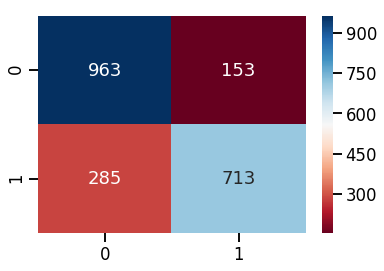

In [45]:
print ('Accuracy Score :', accuracy_score(pred_dt, y_test))
print ('Training Score :', est_dt.score(x_s_res, y_s_res))
print ('Cross Validation Score : ', cross_val_score(est_dt,x_s_res, y_s_res, cv=5).mean())
print (classification_report(pred_dt, y_test))

sns.heatmap(confusion_matrix(pred_dt, y_test), annot=True, cmap='RdBu', fmt='d')

- We can see Decision Tree Works good for us.


- It predicted Negative Class very well with Minimal Error Rate.


- While for Positive Class , It predicted well too but still there is a huge number of Misclassification , i.e, 285.


- We can see our Recall & Precision Scores Jumped up too. Overall, the model is a bit better than Logistic Regression Model.


- Let us try ensemble algorithm - Random Forest.

### Random Forest Classifier

- Random Forest is combination of Multiple Decision Tress within one roof.


- The name itself what it is, "Forest" - A group of Trees. 


- It constructs multiple decision trees at training time and outputs the class that is the mode of the classes (For Classification Problem Statement).

![alt text](https://miro.medium.com/max/592/1*i0o8mjFfCn-uD79-F1Cqkw.png)<br>

In [47]:
from sklearn.ensemble import RandomForestClassifier

est_rf = RandomForestClassifier(max_depth=15, n_estimators=200).fit(x_s_res, y_s_res)
pred_rf = est_rf.predict(x_test)
pred_rf

array([1, 1, 0, ..., 0, 0, 1])

- n_estimators meaning Number of Decision Trees to construct.


- Here we'll consider 200 Trees & Maximum depth of 15.

Accuracy Score : 0.8897824030274362
Training Score : 0.9944633730834753
Cross Validation Score :  0.8779880234087919
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1165
           1       0.91      0.83      0.87       949

    accuracy                           0.89      2114
   macro avg       0.89      0.88      0.89      2114
weighted avg       0.89      0.89      0.89      2114



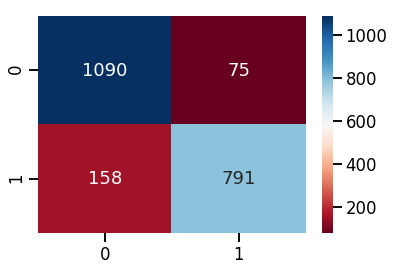

In [48]:
print ('Accuracy Score :', accuracy_score(pred_rf, y_test))
print ('Training Score :', est_rf.score(x_s_res, y_s_res))
print ('Cross Validation Score : ', cross_val_score(est_rf,x_s_res, y_s_res, cv=5).mean())
print (classification_report(pred_rf, y_test))

sns.heatmap(confusion_matrix(pred_rf, y_test), annot=True, cmap='RdBu', fmt='d')

- So Far , Random Forest Classifier is the only Algorithm giving us best Results with Minimal Error Rate.


- We can observe that Misclassification happened for Positive Class is 158. 


- Precision & Recall Scores are also good. 

### ROC-AUC (Receiver Operating Characteristics - Area Under Curve)


- It is a performance measurement for classification problem.


- ROC is a probability curve and AUC represents degree or measure of separability.


- It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. 


- By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.


- The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.

Text(0.5, 1.0, 'Receiver operating characteristic - Area Under Curve (ROC-AUC)')

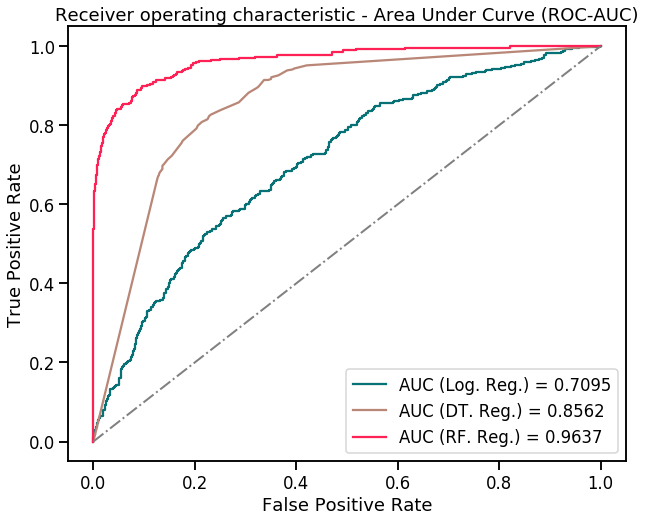

In [58]:
#Roc-Auc

from sklearn.metrics import auc, roc_auc_score, roc_curve

log_prob = est_reg.predict_proba(x_test)
dt_prob = est_dt.predict_proba(x_test)
rf_prob = est_rf.predict_proba(x_test)

fpr, tpr, _ = roc_curve(y_test, log_prob[:,1])
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_prob[:,1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob[:,1])

log_roc_auc = auc(fpr, tpr)
dt_roc_auc = auc(dt_fpr, dt_tpr)
rf_roc_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(10,8))

plt.plot(fpr, tpr, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (Log. Reg.) = %0.4f'% log_roc_auc)
plt.plot(dt_fpr, dt_tpr, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (DT. Reg.) = %0.4f'% dt_roc_auc)
plt.plot(rf_fpr, rf_tpr, color=(np.random.rand(), np.random.rand(), np.random.rand()), label='AUC (RF. Reg.) = %0.4f'% rf_roc_auc)

plt.plot([0,1], 'grey', lw=2, linestyle='-.')

plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver operating characteristic - Area Under Curve (ROC-AUC)')

**Observations :**

- Above we've plotted ROC-AUC for all 3 models.


- As mentioned above, the more the ROC-AUC Score the better is the model.


- We can evaluate Models performance based on this. It's clear Random Forest is giving us Highest Score of 0.9637 followed by Decision Tree & Logistic Regression with Respective Score of 0.8562 & 0.7095.

### Conclusion :

- **We figured out how our dataset was suffering from Class imbalance & so We handled imbalanced dataset with the help of combined efforts of Random Upsampling and SMOTE technique.**


- **From business perspective , it can help doctors to take necessary measures for patients carrying high risk of heart disease.**


- **This can also benefit Insurance Companies to some extent, If effective measures are taken then the number of claims can be reduced.**

### What's next ?


- We can also try to **add more Parameters** for **Tuning the model.**


- One can also try to fill **missing values** by **forward / backward** fill.


- One can try also **implement Deep Neural Network** Modelling.